# Time Series Analysis - ARIMA and SARIMA

# Objective:
 Develop and implement an ARIMA/ SARIMA model to forecast the monthly sales of a company's products.

## ARIMA: Auto Regressive Integrated Moving Average
Steps involved in ARIMA
1. Explonatory data analysis of the data. 
2. Feature Engineering. 
3. Understand the components of the data - Trend, Seasonality, Cyclicity and Irregulairty.
4. Analyse teh stationarity of the data. 
5. Convert the data into stationary form (Get the value of differencing d).  
6. Understand the PACF and ACF plots to get the values of p and q.
7. Construct the ARIMA / SARIMA model with the obtained p,d and q values.
8. Use the model to make predictions

### EDA  & Feature Engineering of the data 

In [2]:
# Importing the necessary modules
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 


In [3]:
# Reading the data 
df = pd.read_csv(r"C:\Users\prasa\Dropbox\PC\Desktop\ML-Projects\TSA\ARIMA_&_SARIMA\TSA_practice_data.csv")
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [6]:
# No of rows and cols in the data 
df.shape

(107, 2)

In [7]:
# Checking for null values 
df.isna().sum()

Month                                                     1
Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64

In [9]:
df[df['Month'].isna()]

,Month,Perrin Freres monthly champagne sales millions ?64-?72
105,NaN,NaN


In [10]:
df[df['Perrin Freres monthly champagne sales millions ?64-?72'].isna()]

,Month,Perrin Freres monthly champagne sales millions ?64-?72
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


#### Note: Dropping null values, as the no of missing values are only 2

In [12]:
# Droping null values
df.dropna(inplace=True)
df.isna().sum()


Month                                                     0
Perrin Freres monthly champagne sales millions ?64-?72    0
dtype: int64

In [13]:
# Understanding the data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Month                                                   105 non-null    object 
 1   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [17]:
# Converting the Month data into date format and indexing the dataframe
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month',inplace=True)
df.head(3)

,Perrin Freres monthly champagne sales millions ?64-?72
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0


In [23]:
# Visualising the data 
import plotly.express as px
fig = px.line(df,y='Perrin Freres monthly champagne sales millions ?64-?72',title="Sales over the years")
fig.update_xaxes(rangeslider_visible = True,title='Year')
fig.update_yaxes(title='Sales')
fig.show()

### Understanding the components of the data

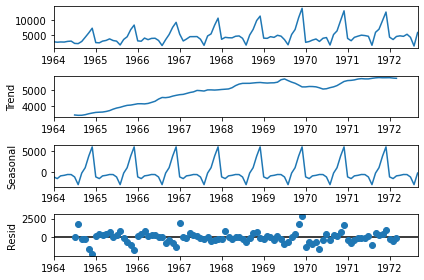

In [41]:
import  statsmodels.api as sm
decompose = sm.tsa.seasonal_decompose(df,model='additive')
decompose.plot()
plt.show()

#### Note: From the graphs, it is clearly evident that seaonality is existing in the data. 
##### As the seasonality is existing, implementing the ARIMA model will produce inaccurate results, SARIMA model can deal better with Seasonal data. Let's try to implement both the things inorder to understand the difference

### Checking for the stationarity of the data

In [42]:
# Implementing Augmented Dicky Fuller test to understand the Stationarity of the data
from statsmodels.tsa.stattools import adfuller

In [48]:
test = adfuller(df)
print("P value from the test: ", test[1])

P value from the test:  0.3639157716602467


In [49]:
# As the P value is >0.05 we can't reject the null hypothesis (Data is not stationary)
# Take difference with it's lag terms inorder to maitain stationarity in the data

### Differencing, in order to attain the stationarity in the data

In [52]:
# Lag of 12 is considered in order to account the seasonality of teh data
df['Seasonal_diff'] = df['Perrin Freres monthly champagne sales millions ?64-?72'] - df['Perrin Freres monthly champagne sales millions ?64-?72'].shift(12)
df.head()

,Perrin Freres monthly champagne sales millions ?64-?72,Seasonal_diff
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN


In [54]:
# Checking the stationarity of the seasonal_diff
test = adfuller(df['Seasonal_diff'].dropna())
print("P value from the test: ", test[1])

P value from the test:  2.0605796968136632e-11


#### Note : As the P value is less than 0.05, Null hypothesis can be rejected. ==> Data is stationary (Seasonal diff data)

In [55]:
fig = px.line(df,y='Seasonal_diff',title = 'Seasona_diff change over years')
fig.show()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 12)'>

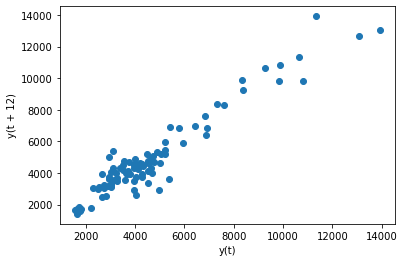

In [58]:
## Understand how much autocorrelation existing in the data with the help of lagplot with lag=12 months
pd.plotting.lag_plot(df['Perrin Freres monthly champagne sales millions ?64-?72'],lag=12)

##### Note: Lag plot is linear => Strong auto correlation of the data over annual cycle

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

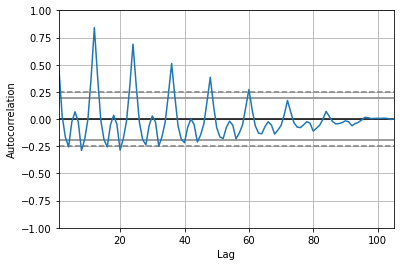

In [67]:
pd.plotting.autocorrelation_plot(df['Perrin Freres monthly champagne sales millions ?64-?72'])
## As per the autocorrelation plot, seasonality can be observed for every 1 year

### Plotting ACF and PACF plots to get q and p values 

In [69]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


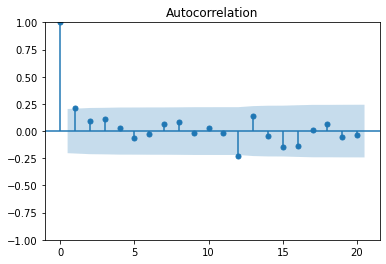

In [75]:
plot_acf(df['Seasonal_diff'].dropna())
plt.show()

#### Value of q from the ACF plot = 2

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



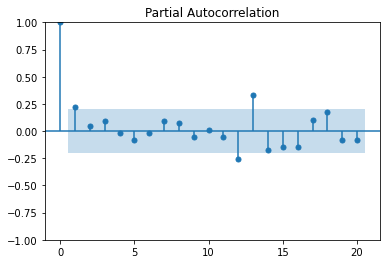

In [76]:
plot_pacf(df['Seasonal_diff'].dropna())
plt.show()

#### Value of p from the PACF plot = 2
#### Value of d (differencing) = 1

### Fitting ARIMA Model

In [79]:
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(df['Perrin Freres monthly champagne sales millions ?64-?72'],order=(1,1,1))
arima_result = arima_model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [80]:
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                 SARIMAX Results                                                  
==================================================================================================================
Dep. Variable:     Perrin Freres monthly champagne sales millions ?64-?72   No. Observations:                  105
Model:                                                     ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                                                    Thu, 29 Jun 2023   AIC                           1911.627
Time:                                                            23:52:28   BIC                           1919.560
Sample:                                                        01-01-1964   HQIC                          1914.841
                                                             - 09-01-1972                                         
Covariance Type:                                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.999      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.316      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Forecast

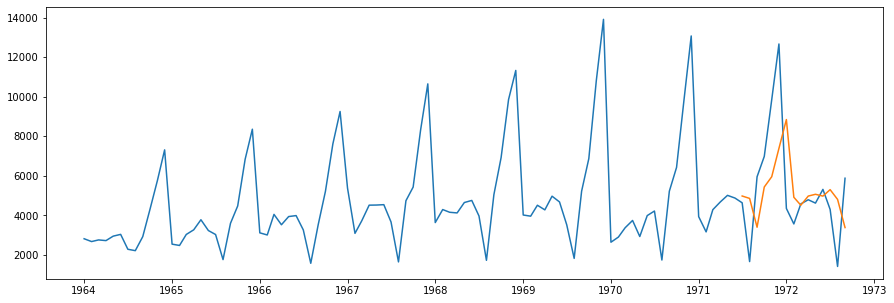

In [83]:
df['Forecast'] = arima_result.predict(90,120)
figure = plt.figure(figsize=(15,5))
plt.plot(df['Perrin Freres monthly champagne sales millions ?64-?72'])
plt.plot(df['Forecast'])

### Implementing the SARIMA model :

In [86]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [88]:
sarima_model = SARIMAX(df['Perrin Freres monthly champagne sales millions ?64-?72'],order=(1,1,1),seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit()


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



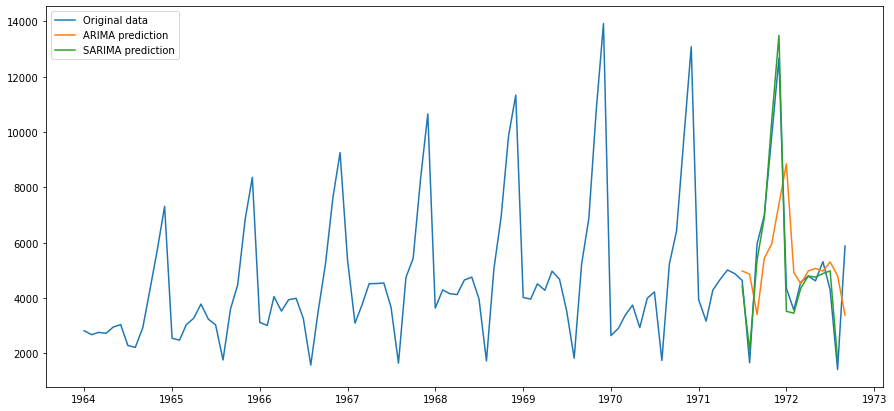

In [93]:
df['Forecast_SARIMA'] = sarima_result.predict(90,103)
plt.figure(figsize=(15,7))
plt.plot(df['Perrin Freres monthly champagne sales millions ?64-?72'],label='Original data')
plt.plot(df['Forecast'],label="ARIMA prediction")
plt.plot(df['Forecast_SARIMA'],label="SARIMA prediction")
plt.legend()

### Note: From the above plot it is very clear that SARIMA model works very well with the seasonal data.

### Checking for error in the prediction

#### ARIMA model error evaluation 

In [97]:
df_arima = df[~df['Forecast'].isna()]
df_arima.isna().sum()


Perrin Freres monthly champagne sales millions ?64-?72    0
Seasonal_diff                                             0
Forecast                                                  0
Forecast_SARIMA                                           1
dtype: int64

In [101]:
from sklearn.metrics import mean_absolute_error 
print("Mean absolute error of ARIMA model: "
    ,mean_absolute_error(df_arima['Perrin Freres monthly champagne sales millions ?64-?72'],df_arima['Forecast']))

arima_error = mean_absolute_error(df_arima['Perrin Freres monthly champagne sales millions ?64-?72'],df_arima['Forecast'])

Mean absolute error of ARIMA model:  2039.745093613571


#### SARIMA model error evaluation:


In [99]:
df_sarima = df[~df['Forecast_SARIMA'].isnull()]
df_sarima.isna().sum()

Perrin Freres monthly champagne sales millions ?64-?72    0
Seasonal_diff                                             0
Forecast                                                  0
Forecast_SARIMA                                           0
dtype: int64

In [102]:
print("Mean absolute error of SARIMA model: "
    ,mean_absolute_error(df_sarima['Perrin Freres monthly champagne sales millions ?64-?72'],df_sarima['Forecast_SARIMA']))

sarima_error = mean_absolute_error(df_sarima['Perrin Freres monthly champagne sales millions ?64-?72'],df_sarima['Forecast_SARIMA'])

Mean absolute error of SARIMA model:  390.4641897020678


In [103]:
print("""Error of SARIMA is {} time less as compared to ARIMA model""".format(arima_error/sarima_error))

Error of SARIMA is 5.223897984524364 time less as compared to ARIMA model


### Forcasting the Sales with SARIMA model

In [104]:
from pandas.tseries.offsets import DateOffset


In [110]:
future_dates = [df.index[-1]+DateOffset(months=x) for x in range(0,24)]
future_dates

[Timestamp('1972-09-01 00:00:00'),
 Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00')]

In [111]:
future_dates_df = pd.DataFrame(index=future_dates,columns=df.columns)
future_dates_df.head()

,Perrin Freres monthly champagne sales millions ?64-?72,Seasonal_diff,Forecast,Forecast_SARIMA
1972-09-01,NaN,NaN,NaN,NaN
1972-10-01,NaN,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN,NaN
1973-01-01,NaN,NaN,NaN,NaN


In [114]:
future_df = pd.concat((df,future_dates_df),axis=0)
future_df.tail()

,Perrin Freres monthly champagne sales millions ?64-?72,Seasonal_diff,Forecast,Forecast_SARIMA
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [115]:
future_df['SARIMA_Forecast_Future'] = sarima_result.predict(start='1972-04-01',end='1974-08-01')
future_df.tail()

,Perrin Freres monthly champagne sales millions ?64-?72,Seasonal_diff,Forecast,Forecast_SARIMA,SARIMA_Forecast_Future
1974-04-01,NaN,NaN,NaN,NaN,5189.237754
1974-05-01,NaN,NaN,NaN,NaN,5119.280080
1974-06-01,NaN,NaN,NaN,NaN,5675.027477
1974-07-01,NaN,NaN,NaN,NaN,4725.987273
1974-08-01,NaN,NaN,NaN,NaN,1823.260241


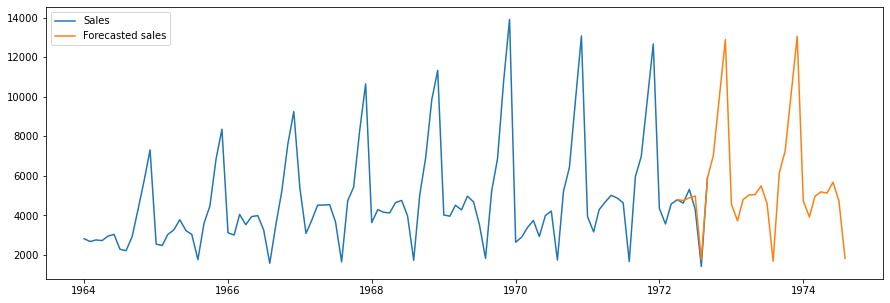

In [120]:
plt.figure(figsize=(15,5))
plt.plot(future_df['Perrin Freres monthly champagne sales millions ?64-?72'], label="Sales")
plt.plot(future_df['SARIMA_Forecast_Future'], label="Forecasted sales")
plt.legend()
plt.show()